Import packages and load data

# Principle Component Analysis (PCA)

This is an example of PCA implemented using numpy using sign language image data.  The goal is to extract the principle components for an individual class of images in the dataset.

(1644, 64, 64, 1)
(1644, 10)
0,0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0,1 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0,2 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0,162 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1,163 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2,326 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
2,327 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2,488 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3,489 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3,490 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
3,491 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
3,492 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
0 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
7 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
10 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
12 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
13 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
14 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
15 [1.

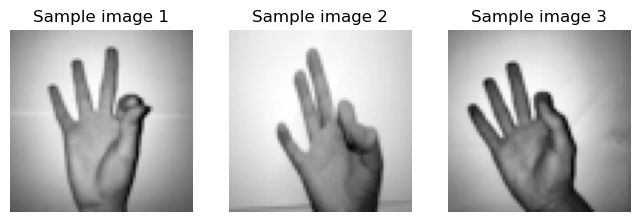

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X_all = np.load(open('X_train.npy', 'rb'))
# X_all = np.load(open(r'C:\Users\rober\OneDrive\Side Projects\Programming\Machine Learning\Principal_Component_Analysis\X_train.npy', 'rb'))
Y_all = np.load(open('Y_train.npy', 'rb'))
# Y_all = np.load(open(r'C:\Users\rober\OneDrive\Side Projects\Programming\Machine Learning\Principal_Component_Analysis\Y_train.npy', 'rb'))
print(X_all.shape)
print(Y_all.shape)
print('0,0',Y_all[0,]) # y=0
print('0,1',Y_all[1,]) # y=0
print('0,2',Y_all[2,]) # y=0
print('0,162',Y_all[162,]) # y=0
print('1,163',Y_all[163,]) # y=1
print('2,326',Y_all[326,]) # y=2
print('2,327',Y_all[327,]) # y=2
print('2,488',Y_all[488,]) # y=2
print('3,489',Y_all[489,]) # y=3
print('3,490',Y_all[490,]) # y=3
print('3,491',Y_all[491,]) # y=3
print('3,492',Y_all[492,]) # y=3

for i in range (492):
    print(i, Y_all[i,])

# Extract the first 163 rows and remove the last dimension
X = X_all[:163, :, :, 0]

# Flatten the 2nd and 3rd dimensions into a single column
X = X.reshape(163, -1)

print('X shape:', X.shape)

# Print some sample images
fig = plt.figure(figsize=(8, 4))
for i, idx in enumerate([0, 50, 100]):
#for i,idx in enumerate ([164,50,264]):
    fig.add_subplot(1, 3, i+1)
    img = X_all[idx,:,:,0]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Sample image {}'.format(i+1))
plt.show()


# Center Data

In this example, we subtract the mean from each sample to center the data.  We avoid dividing each centered sample by the standard deviation to facilitate more accurate reconstruction of the data in later steps.

In [5]:
# Calculate mean
X_mean = np.mean(X, axis=0)  # gets the average for every row in the matrix, and returns a (4096, ) vector

# Subtract mean of the column from each entry of X in that column. Store in Xtilde
Xtilde = X - X_mean
# X shape: (163, 4096)

print ('Shape of centerized data',Xtilde.shape)
print('First 5 elements of the first column in X_tilde:', Xtilde[:5,0])
print('First 5 elements of the last column in X_tilde:', Xtilde[:5,-1])


Shape of centerized data (163, 4096)
First 5 elements of the first column in X_tilde: [-0.01975209 -0.01583052  0.2939734   0.32534593 -0.0432815 ]
First 5 elements of the last column in X_tilde: [-0.06082091  0.01761046  0.08427715  0.23329675  0.00192419]


Expected output of centering operation:

**Shape of the centerized data:** (163, 4096)<br>
**First 5 elements of first column in X_tilde:** [-0.01975209 -0.01583052  0.2939734   0.32534593 -0.0432815 ]<br>
**First 5 elements of last column in X_tilde:** [-0.06082091  0.01761046  0.08427715  0.23329675  0.00192419]


# Construct Covariance Matrix and Compute Eigenvectors

The principal components of the image data can be obtained by computing the eigenvectors ${\mathbf {\mathit{u}}}_j$ of the covariance matrix $\frac{1}{m}\tilde{\mathbf {\mathit{X}}}^{T}\tilde{\mathbf {\mathit{X}}}$.

The shape of $\frac{1}{m}\tilde{\mathbf {\mathit{X}}}^{T}\tilde{\mathbf {\mathit{X}}}$ is $n\times n$, and it will be slow to carry out eigen decomposition when $n$ is large (In our case, $n=64\times 64=4096$). Therefore, we need to use an alternative method to more efficiently calculate the eigenvectors.

The alternative method is that we first compute the eigenvectors ${\mathbf {\mathit{v}}}_j$ of the matrix $\frac{1}{m}\tilde{X}\tilde{X}^{T}$ (of shape $m\times m$), which satisfy the following equation:


\begin{equation}
\big(\frac{1}{m}\tilde{X}\tilde{X}^{T}\big){\mathbf {\mathit{v}}}_j = \lambda_j {\mathbf {\mathit{v}}}_j
\end{equation}


where $\lambda_j$ is the corresponding non-zero eigenvalue. Note that $\lambda_j/\sum{\lambda_i}$ measures the proportion of variance that the $j$th principal component explains.
Because here $m=163$ is much smaller than $n=4096$, the computation for ${\mathbf {\mathit{v}}}_j$ is much faster. Then we can compute the eigenvectors of $\frac{1}{m}\tilde{X}^{T}\tilde{X}$ by:  $u_j = {\tilde{X}}^{T}{\mathbf {\mathit{v}}}_j$.

We must also normalize $u_j$ with $u_j = \frac{u_j}{||u_j||}$, so that it satisfies the $||u_j||=1$ constraint of principal components.

In [7]:
# Construct the covariance matrix (covmat) for computing Eigen Values and Eigen-vectors
# print(f'Shape of Xtilde: {Xtilde.shape}')
m, n = Xtilde.shape

covmat = (1 / m) * np.dot(Xtilde, Xtilde.T)
# print(f'Shape of covariance matrix: {covmat.shape}')

# Compute the eigenvalues (w) and eigenvectors (v)
w, v = np.linalg.eig(covmat)
print('shape of v', v.shape)

# Compute u_i from v, and store it in the variable U
# U = np.dot(Xtilde.T, v)
U = Xtilde.T @ v
# print ('shape of U after Xtilde @ v:', U.shape)

# Normalize u_i, i.e., each column of U
U_magnitudes = np.linalg.norm(U, axis=0)
U = U / U_magnitudes

print ('shape of U', U.shape)

shape of v (163, 163)
shape of U (4096, 163)


Expected output of eigenvector calculations

shape of v (163, 163)<br>
shape of U (4096, 163)

# Evaluate Eigenvalues

PC1 explains 14.32% of the total variance
PC2 explains 7.08% of the total variance
First 100 PCs explains 94.74% of the total variance

Shape of U: (4096, 163)
First 5 elements of the first column of U: [0.03381537 0.03353881 0.03292298 0.03238798 0.03146345]
First 5 elements of the last column of U: [0.00672684 0.0049604  0.00672161 0.00759437 0.0054363 ]


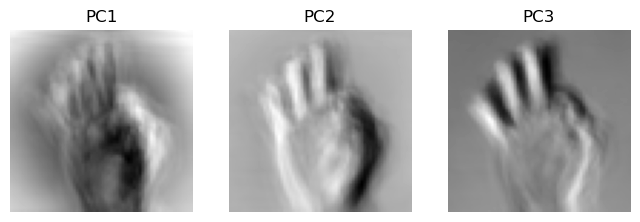

In [8]:
ratios = w / np.sum(w)
print('PC1 explains {:.2f}% of the total variance'.format(ratios[0] * 100))
print('PC2 explains {:.2f}% of the total variance'.format(ratios[1] * 100))
print('First 100 PCs explains {:.2f}% of the total variance'.format(sum(ratios[:100]) * 100))
print()

# Evaluate U
print('Shape of U:', U.shape)
print('First 5 elements of the first column of U:', U[:5,0])
print('First 5 elements of the last column of U:',U[:5,-1])

# Plot eigenvectors as if they are image data, i.e., eigenhands
fig = plt.figure(figsize=(8, 4))
for i in range(3):
    img = U[:, i].reshape((64, 64))
    fig.add_subplot(1, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('PC' + str(i+1))
plt.show()

# Reduce dimension and visualize

After finding the principal components, we can reduce the dimensionality of the data by projecting the original data onto the principal components obtained by calculating the eigenvectors of the covariance matrix.

One of the benefits of finding the principal components of a dataset is to aid in visualization of the data.  Naturally, this would imply that graphing the first two or three principal components would reduce the data to 2D or 3D space.  Here, we select the first 2 principal components for visualization in 2D space.

Let $u_1$ and $u_2$ be the 1st and 2nd columns of matrix `U`, the projection of an image data $\tilde{x}$ (already centered) can be done by computing the inner products $d_1 = {\tilde{x}}u_1$ and $d_2 = {\tilde{x}}u_2$. Then we can visualize the data using a scatter plot of $y_1$ and $y_2$.

Shape of D: (163, 2)
First 5 elements of first column of D: [-0.891419   0.4688381  6.001114   7.350197   1.0118954]
First 5 elements of second column of D: [-0.8475755 -1.0585914  5.87191    1.2650037 -3.0990107]


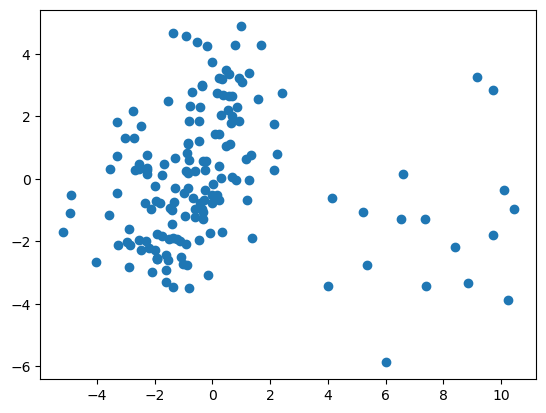

In [11]:
D = np.dot(Xtilde, U[:, :2])

print('Shape of D:', D.shape)
print('First 5 elements of first column of D:', D[:5,0])
print('First 5 elements of second column of D:', D[:5,1])

fig = plt.figure()
plt.scatter(D[:,0], -D[:,1])
plt.show()

# Project and reconstruct

Beyond projecting the original data onto the principal components to aid in visualization, we can also use the projections to reconstruct the original data from its principal components.

Let $\tilde{x}$ be the original data, and its projections on the first $k$ principal components be $d_j = {\tilde{x}}u_j, j=1,2,...k$. Then we can reconstruct the data $\tilde{x}'$ by:

\begin{equation}
\tilde{x}' = \sum_{j=1}^{k}d_{j}{u_j}^{T}
\end{equation}

If the entire set of principal components are used, then the reconstruction can be complete, or in other words, exactly the same as the original image data without losing any information. If a subset of the principal components are used, then the reconstruction will cause some information loss.

This information loss can be measured by the Euclidean distance between the original data $\tilde{x}$ and the reconstructed data $\tilde{x}'$. Larger distances indicate higher information loss.

Mean distance of reconstruction using 163 PCs: 0.0048460219986736774
Mean distance of reconstruction using 100 PCs: 1.815385103225708
Mean distance of reconstruction using 50 PCs: 3.2072267532348633


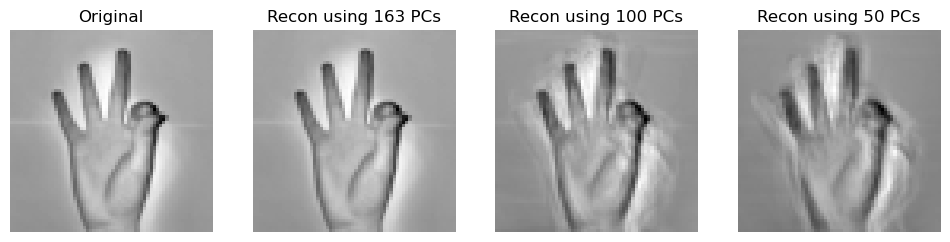

In [14]:
def project_reconstruct(X, U, num_dims):
    """
    Args:
    X -- centerized image data, of shape (m, n)
    U -- numpy array containing principal components, of shape (n, m)
    num_dims -- the number of PCs upon which to project X.

    Return:
    X_proj -- projections on the top num_dims PCs, of shape (m, num_dims)          # original (erroneous) shape: (num_dims,m)
    X_recon -- reconstructed data, of shape (m,n)
    dist -- Euclidean distance between X and X_recon, of shape (m,)
    """
    # print(f'shape of X: {X.shape}')
    # print(f'shape of U: {U.shape}')
    # print(f'num_dims: {num_dims}')

    # project data onto new PCs
    X_proj = np.dot(X, U[:, :num_dims])
    # print(f'shape of X_proj: {X_proj.shape}')

    # reconstruct original data using the projections
    X_recon = np.dot(X_proj, U[:, :num_dims].T)
    # print(f'shape of X_recon: {X_recon.shape}')

    # compute the amount of information lost in the reconstruction
    dist = np.linalg.norm(X - X_recon, axis=1)  # use axis=1 to select the columns for the distance calculation

    return X_proj, X_recon, dist

fig = plt.figure(figsize=(12, 6))
fig.add_subplot(1, 4, 1)
img_orig = Xtilde[0,:].reshape((64, 64))
plt.imshow(img_orig, cmap='gray')
plt.axis('off')
plt.title('Original')

for i, num_dims in enumerate([163, 100, 50]):
    X_proj, X_recon, dist = project_reconstruct(Xtilde, U, num_dims)
    print('Mean distance of reconstruction using {} PCs: {}'.format(num_dims, np.mean(dist)))

    fig.add_subplot(1, 4, i+2)
    img_recon = X_recon[0,:].reshape((64, 64))
    plt.imshow(img_recon, cmap='gray')
    plt.axis('off')
    plt.title('Recon using {} PCs'.format(num_dims))

# playing around to see how using a smaller number of PCs would affect the reconstruction
# for i, num_dims in enumerate([25, 10, 5]):
#     X_proj, X_recon, dist = project_reconstruct(Xtilde, U, num_dims)
#     print('Mean distance of reconstruction using {} PCs: {}'.format(num_dims, np.mean(dist)))
#
#     fig.add_subplot(1, 4, i+2)
#     img_recon = X_recon[0,:].reshape((64, 64))
#     plt.imshow(img_recon, cmap='gray')
#     plt.axis('off')
#     plt.title('Recon using {} PCs'.format(num_dims))

plt.show()

# Detection of New Image Data

If we project the image data of a different class onto the principal components that we extracted above, we will find the Euclidean distance between the reconstructed and original data to be very large, and the reconstructed image will likely not be recognizable even if the entire set of principal components are used in the reconstruction.  This occurs because the principal components summarize the image data for the current class well, but does not generalize to the data from other classes of images.

This characteristic of principal component analysis can be leveraged in applications that involve facial recognition or data validation tasks.

Reconstruction distance for out-of-class data: 4.9030194


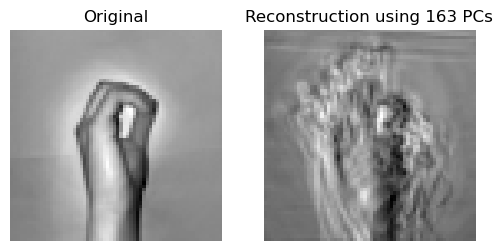

In [15]:
X2 = X_all[164:327, :, :, 0]

# Flatten the 2nd and 3rd dimensions into a single column
X2 = X2.reshape(163, -1)

mean_vec2 = X2.mean(axis=0, keepdims=True)

Xtilde2 = X2 - mean_vec2

num_dims = 163

_, X2_recon, dist = project_reconstruct(Xtilde2, U, num_dims)

print('Reconstruction distance for out-of-class data:', dist[0])

fig = plt.figure(figsize=(6,3))
fig.add_subplot(1, 2, 1)
img_orig = Xtilde2[0,:].reshape((64, 64))
plt.imshow(img_orig, cmap='gray')
plt.axis('off')
plt.title('Original')


fig.add_subplot(1, 2, 2)
img_recon = X2_recon[0,:].reshape((64, 64))
plt.imshow(img_recon, cmap='gray')
plt.axis('off')
plt.title('Reconstruction using {} PCs'.format(num_dims))

plt.show()
